In [1]:
import numpy as np
import matplotlib . pyplot as plt

k, theta = 0.1, 0.05
sigma, R0 = 0.1, 0.07
T1,T2 = 1, 2
N = 10000
dt = T1/N

#function : generate Brownian Motion
def dWt(n=N):
    return np.sqrt(dt)*np.random.randn(n)

#function : generate short rate process
def R(Wt):
    r = np.ones(N+1) * R0
    for i in range (N):
        r[i+1] = r[i] + k * ( theta - r[i] ) * dt + sigma * Wt[i]
    return r

#function : generate Bond price process
def G( t ,T):
     factor1 = ( theta /k - sigma **2/k**3)*(1 - np.exp( - k*(T- t ) ) )
     factor2 = ( sigma **2/(2*k**2) - theta )*(T - t )
     factor3 = sigma **2/(4*k**3)*(1 -np.exp( - 2*k*(T - t ) ) )
     return factor1+factor2+factor3

def H( t ,T):
    return 1/k*(np.exp( - k*(T - t)) - 1)

def B(Wt,T):
    r = R(Wt)
    b0 = np.exp(G(0 ,T) + H(0 ,T) * R0)
    b = np.ones (N+1) * b0
    for i in range(N+1):
        t = i * dt
        b[i] = np.exp(G(t,T)+H(t,T)*r[i] )
    return b

#function : generate replication port fol io
def X(Wt,T1,T2):
    x0 = np.exp(G(0 ,T1)+H(0 ,T1)*R0)
    x = np.ones(N+1)*x0
    r = R(Wt)
    BT2 = B(Wt,T2)
    for i in range (N):
        t = i * dt
        delta = np.exp(G(t,T1) - G(t,T2)+r[i]*(H(t,T1) - H(t,T2) ) )*(H(t,T1)/H(t,T2) )
        x[i+1] = x[i] + delta*(BT2[i+1] - BT2[i] ) + (x[i] - delta*BT2[i])*r[i]*dt
    return x

In [2]:
#simulation
dW = dWt(n=N)
r = R(dW)
BT1 = B(dW,T1)
x = X(dW,T1,T2)
t = np.linspace (0 ,T1 ,N+1)
error = np.zeros (1000)

In [3]:
for i in range (1000):
    dW = dWt(n=N)
    BT1 = B(dW,T1)
    x = X(dW,T1,T2)
    error [i] = x[ - 1] - BT1[ - 1]

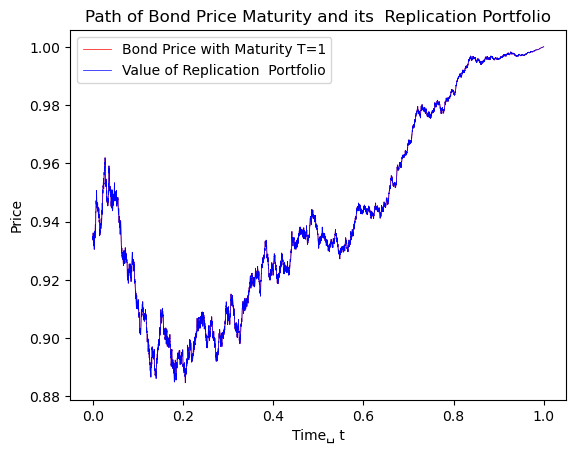

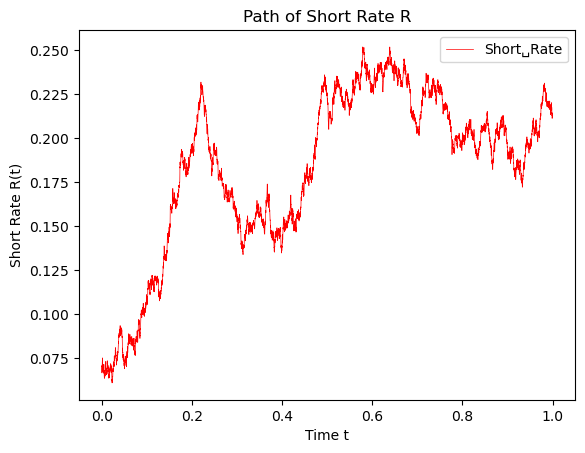

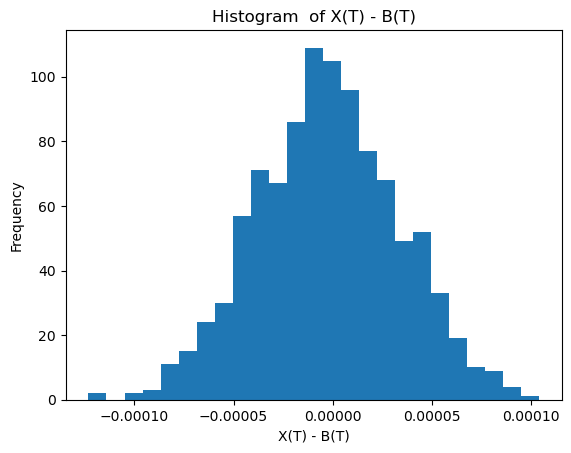

In [13]:
#plot
plt.plot(t ,BT1, linewidth = 0.5 , c = 'red' , label = 'Bond Price with Maturity T=1' )
plt.plot(t, x, linewidth = 0.5 , c = 'blue' , label = 'Value of Replication  Portfolio')
plt.legend (loc = 'best')
plt.ylabel('Price')
plt.xlabel('Time␣ t')
plt.title('Path of Bond Price Maturity and its  Replication Portfolio')
plt.show()
plt.plot(t, r, c='red', label= 'Short␣Rate', linewidth=0.5)
plt.legend(loc= 'best')
plt.ylabel('Short Rate R(t)')
plt.xlabel('Time t')
plt.title('Path of Short Rate R')
plt.show()
plt.hist(error, 25 )
plt.title( 'Histogram  of X(T) - B(T)' )
plt.ylabel('Frequency')
plt.xlabel( 'X(T) - B(T)' )
plt.show ( )